In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

f = lambda x: np.sin(x*x)

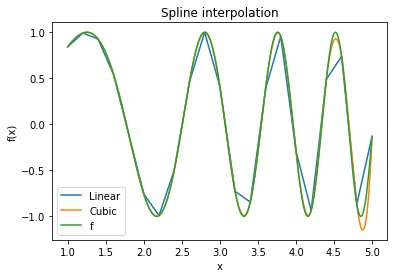

In [2]:
    n = 20
    x_knots = np.linspace(1, 5, n+1)
    y_knots = f(x_knots)

    xs = []
    ys_lin = []

    for i, left_x in enumerate(x_knots[0:-1]):
        right_x = x_knots[i+1]
        dx = right_x - left_x
        for x in np.linspace(0,1,100):
            xs.append(left_x + x*dx)
            ys_lin.append(y_knots[i]*(1-x) + y_knots[i+1]*x)

            
            
    xs = np.array(xs)

    tck = interpolate.splrep(x_knots, y_knots, s=0)
    ys_cubic = interpolate.splev(xs, tck, der=0)

    plt.figure()
    plt.plot(xs, ys_lin, label="Linear")
    plt.plot(xs, ys_cubic, label="Cubic")
    plt.plot(xs, f(xs), label="f")
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.legend()
    plt.title('Spline interpolation')
    plt.show()

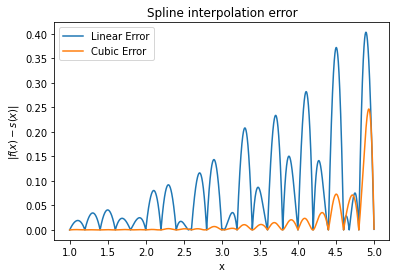

In [3]:
    n = 20
    x_knots = np.linspace(1, 5, n+1)
    y_knots = f(x_knots)

    xs = []
    ys_lin = []

    for i, left_x in enumerate(x_knots[0:-1]):
        right_x = x_knots[i+1]
        dx = right_x - left_x
        for x in np.linspace(0,1,1000, endpoint=False):
            xs.append(left_x + x*dx)
            ys_lin.append(y_knots[i]*(1-x) + y_knots[i+1]*x)

            
            
    xs = np.array(xs)

    tck = interpolate.splrep(x_knots, y_knots, s=0)
    ys_cubic = interpolate.splev(xs, tck, der=0)

    fxs = f(xs)
    plt.figure()
    plt.plot(xs, abs(f(xs) - ys_lin), label="Linear Error")
    plt.plot(xs, abs(f(xs) - ys_cubic), label="Cubic Error")
    plt.ylabel("$|f(x) - s(x)|$")
    plt.xlabel("x")
    plt.legend()
    plt.title('Spline interpolation error')
    plt.show()

In [4]:
# Linear seems more "bouncy" between each knot because 
#     thats when the linear spline deviates most, 
#     as seen in the graph in [2]
# Cubic seems to deviate more at the end, 
#     likely because f moves too much for 20 knots, 
#     and the f''(x_20) = 0 probably adds to the error too.

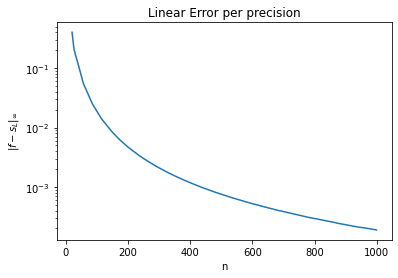

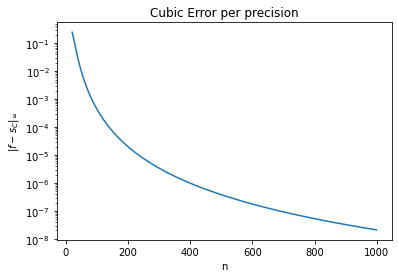

In [5]:
    def inorm(n):
        x_knots = np.linspace(1, 5, n+1)
        y_knots = f(x_knots)

        xs = []
        ys_lin = []

        for i, left_x in enumerate(x_knots[0:-1]):
            right_x = x_knots[i+1]
            dx = right_x - left_x
            for x in np.linspace(0,1,round(10000.0/n), endpoint=False):
                xs.append(left_x + x*dx)
                ys_lin.append(y_knots[i]*(1-x) + y_knots[i+1]*x)

                
                
        xs = np.array(xs)

        tck = interpolate.splrep(x_knots, y_knots, s=0)
        ys_cubic = interpolate.splev(xs, tck, der=0)

        fxs = f(xs)

        return (max(abs(fxs - ys_lin)), max(abs(fxs - ys_cubic)))

    xs = np.arange(20,1000)
    ys_cub = np.empty_like(xs, dtype=float)
    ys_lin = np.empty_like(xs, dtype=float)
    for i,n in enumerate(xs):
        (ys_lin[i], ys_cub[i]) = inorm(n)

    plt.figure()
    plt.yscale("log")
    plt.plot(xs, ys_lin)
    plt.ylabel(r'$|f - s_L|_\infty$')
    plt.xlabel("n")
    plt.title('Linear Error per precision')
    plt.show()

    plt.figure()
    plt.yscale("log")
    plt.plot(xs, ys_cub)
    plt.ylabel(r'$|f - s_C|_\infty$')
    plt.xlabel("n")
    plt.title('Cubic Error per precision')
    plt.show()

In [6]:
# As expected, both increase accuracy very well as n goes up.  
#    And cubic is much more accurate than linear.